# INSIGHTS DOS DADOS
###### Os bairros que possuem os maiores valores de faturamento, deve-se ao fato da relação com uma maior distribuição da "Quantidade de Domicicilios de Renda A1, A2 e B1. Ou seja, os bairros que apresentam as maiores distribuição da "Quantidade de Domicilios de Renda A1, A2 e B1, consequentemente possuem os maiores valores de faturamentos. 

###### Os bairros que possuem os menores valores de faturamento, deve-se ao fato da relação com uma menor distribuição da "Quantidade de Domicicilios de Renda A1, A2 e B1" e uma maior distribuição da "Quantidade de Domicicilios de Renda B2, C1, C2, D e D". Ou seja, os bairros que apresentam as menores distribuição de "Quantidade de Domicilios de Renda A1, A2 e B1, consequentemente possuem os menores valores de faturamentos.

#### A faixa etária predominante da população dos bairros da cidade do RIO DE JANEIRO, são Adultos (entre 20 A 59 anos de idade)


In [3]:
#importando as blibliotecas para analisar e manipular os dados
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import colorsys
!pip install seaborn --upgrade
import seaborn as sns


#estilos prontos para criar um gráfico
plt.style.use('seaborn-talk') 

import warnings
warnings.filterwarnings("ignore")

#gera os gráficos dentro do notebook
%matplotlib inline

### Abrindo o arquivo csv e informando a quantidade de linhas e colunas que a tabela possui 

In [4]:
#abrindo o arquivo csv com os dados referente aos bairros do Rio de Janeiro 
dadosCSV = pd.read_csv('.\dados.csv')

#informa a quantidade de linhas e colunas que a tabela possui
dadosCSV.shape 

(160, 23)

### LENDO A TABELA DE DADOS 

In [5]:
print(dadosCSV.head()) #imprimir a tabela com os dados

       codigo               nome          cidade estado  população  popAte9  \
0  3304557060           Abolição  Rio de Janeiro     RJ      11676     1027   
1  3304557138              Acari  Rio de Janeiro     RJ      27564     5131   
2  3304557057         Água Santa  Rio de Janeiro     RJ       9003      883   
3  3304557031  Alto Da Boa Vista  Rio de Janeiro     RJ       9606     1072   
4  3304557125           Anchieta  Rio de Janeiro     RJ      57222     7677   

   popDe10a14  popDe15a19  popDe20a24  popDe25a34  ...  domiciliosA1  \
0         483         688         800        1675  ...             0   
1        2188        2697        2630        4810  ...             0   
2         399         597         762        1755  ...             0   
3         538         660         685        1317  ...           114   
4        3774        4892        4600        8660  ...             0   

   domiciliosA2  domiciliosB1  domiciliosB2  domiciliosC1  domiciliosC2  \
0           145  

### MOSTRANDO AS INFORMAÇÕES SOBRE OS DADOS

In [6]:
#A partir das informações obtidas, observamos que na coluna "rendaMedia" possuem 6 valores NULOS (NULL)
print(dadosCSV.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codigo        160 non-null    int64  
 1   nome          160 non-null    object 
 2   cidade        160 non-null    object 
 3   estado        160 non-null    object 
 4   população     160 non-null    int64  
 5   popAte9       160 non-null    int64  
 6   popDe10a14    160 non-null    int64  
 7   popDe15a19    160 non-null    int64  
 8   popDe20a24    160 non-null    int64  
 9   popDe25a34    160 non-null    int64  
 10  popDe35a49    160 non-null    int64  
 11  popDe50a59    160 non-null    int64  
 12  popMaisDe60   160 non-null    int64  
 13  domiciliosA1  160 non-null    int64  
 14  domiciliosA2  160 non-null    int64  
 15  domiciliosB1  160 non-null    int64  
 16  domiciliosB2  160 non-null    int64  
 17  domiciliosC1  160 non-null    int64  
 18  domiciliosC2  160 non-null    

### DELETANDO AS LINHAS QUE POSSEUM VALORES NULLs  e VERIFICANDO SE AS LINHAS FORAM REALMENTE DELETADAS 

In [7]:
#DELETANDO AS LINHAS QUE POSSEUM VALORES NULLs
dadosCSV.dropna(inplace = True) 
#verificando se as LINHAS com valores NULLSs foram realmente DELETADAS
print(dadosCSV.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 159
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codigo        154 non-null    int64  
 1   nome          154 non-null    object 
 2   cidade        154 non-null    object 
 3   estado        154 non-null    object 
 4   população     154 non-null    int64  
 5   popAte9       154 non-null    int64  
 6   popDe10a14    154 non-null    int64  
 7   popDe15a19    154 non-null    int64  
 8   popDe20a24    154 non-null    int64  
 9   popDe25a34    154 non-null    int64  
 10  popDe35a49    154 non-null    int64  
 11  popDe50a59    154 non-null    int64  
 12  popMaisDe60   154 non-null    int64  
 13  domiciliosA1  154 non-null    int64  
 14  domiciliosA2  154 non-null    int64  
 15  domiciliosB1  154 non-null    int64  
 16  domiciliosB2  154 non-null    int64  
 17  domiciliosC1  154 non-null    int64  
 18  domiciliosC2  154 non-null    

#### SOMATÓRIA DA POPULAÇÃO DOS BAIRROS DO RIO DE JANEIRO: popAte9, popDe10a14, popDe15a19, popDe20a24, popDe25a34, popDe35a49, popDe50a59, popMaisDe60

In [8]:
popAte9 = dadosCSV['popAte9'].cumsum().iloc[-1] #SOMATÓRIA DA População até 9 anos de idade 
popDe10a14 = dadosCSV['popDe10a14'].cumsum().iloc[-1] #SOMATÓRIA DA População entre 10 a 14 anos de idade
popDe15a19 = dadosCSV['popDe15a19'].cumsum().iloc[-1] #SOMATÓRIA DA População entre 15 a 19 anos de idade
popDe20a24 = dadosCSV['popDe20a24'].cumsum().iloc[-1] #SOMATÓRIA DA População entre 20 a 24 anos de idade
popDe25a34 = dadosCSV['popDe25a34'].cumsum().iloc[-1] #SOMATÓRIA DA População entre 25 a 34 anos de idade
popDe35a49 = dadosCSV['popDe35a49'].cumsum().iloc[-1] #SOMATÓRIA DA População entre 35 a 49 anos de idade
popDe50a59 = dadosCSV['popDe50a59'].cumsum().iloc[-1] #SOMATÓRIA DA População entre 50 a 59 anos de idade
popMaisDe60 = dadosCSV['popMaisDe60'].cumsum().iloc[-1] #SOMATÓRIA DA População com mais de 60 anos de idade

#### LISTA COM OS VALORES DE CADA SOMATÓRIA QUE FORAM REALIZADAS 
listaPop = [popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34, popDe35a49,popDe50a59, popMaisDe60]
print(listaPop)


[832105, 387901, 509912, 521549, 1024151, 1370894, 827724, 1159689]


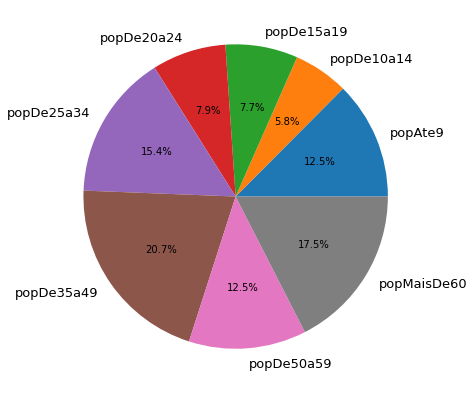

In [14]:
#GERANDO O GRÁFICO 

plt.figure(figsize=(7,7))
legendaPop =['popAte9', 'popDe10a14', 'popDe15a19', 'popDe20a24', 'popDe25a34', 'popDe35a49', 'popDe50a59', 'popMaisDe60']
plt.pie(x = listaPop, labels= legendaPop, autopct = '%.1f%%', radius = 1)
plt.show()

# Somatória da população dos Bairros do Rio de Janeiro: qual é a idade predominate ?

##### Resposta: População - de 35 a 49 anos


# Somatória da população dos Bairros do Rio de Janeiro: qual é a idade minoritária?
##### Resposta: População - de 10 a 14 anos


## Definindo a faixa etária da população do RIO DE JANEIRO 

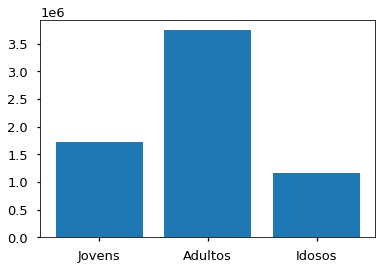

In [39]:
#jovens - do nascimento até aos 19 anos de idade;
#adultos - corresponde à população que possui entre 20 a 59 anos de idade;
#idosos - pessoas que apresentam 60 anos de idade ou mais;

jovens = popAte9 + popDe10a14 + popDe15a19
adultos = popDe20a24 + popDe25a34 + popDe35a49 + popDe50a59
idosos = popMaisDe60
faixaEtaria = [jovens, adultos, idosos]

#gerando o gráfico das faixas etárias da população do RIO DE JANEIRO


legendaFaixaEtaria =['Jovens','Adultos', 'Idosos']
plt.bar(legendaFaixaEtaria, faixaEtaria)
plt.show()

# Faixa etária predominante da população dos bairros do RIO DE JANEIRO?
#### ADULTOS - de 20 A 59 anos de idade

In [40]:
# Há uma relação forte entre o valor do faturamento com os domicilios de renda A1 e A2 e B1
# Há uma realação forte com a distribuição da população em relação aos domicilios. 
#Sendo assim, a distruição da população é predominante aos domicilios de renda (B2, C1, C2, D e E) 

dadosCSV[['população','domiciliosA1','domiciliosA2','domiciliosB1','domiciliosB2','domiciliosC1','domiciliosC2','domiciliosD','domiciliosE','rendaMedia','faturamento']].corr()

,população,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
população,1.000000,0.185050,0.292196,0.565363,0.905439,0.928215,0.861135,0.832294,0.823415,-0.026747,-0.169300
domiciliosA1,0.185050,1.000000,0.929321,0.719123,0.255843,0.046048,-0.041649,-0.072007,0.063286,0.502224,0.757360
domiciliosA2,0.292196,0.929321,1.000000,0.896174,0.438076,0.168001,0.034866,-0.000580,0.114435,0.414954,0.781901
domiciliosB1,0.565363,0.719123,0.896174,1.000000,0.744524,0.476200,0.302998,0.260777,0.329335,0.245900,0.611988
domiciliosB2,0.905439,0.255843,0.438076,0.744524,1.000000,0.921113,0.799239,0.762202,0.755079,-0.021212,0.009096
domiciliosC1,0.928215,0.046048,0.168001,0.476200,0.921113,1.000000,0.961086,0.940559,0.903801,-0.128446,-0.327108
domiciliosC2,0.861135,-0.041649,0.034866,0.302998,0.799239,0.961086,1.000000,0.988650,0.956927,-0.166935,-0.481882
domiciliosD,0.832294,-0.072007,-0.000580,0.260777,0.762202,0.940559,0.988650,1.000000,0.955385,-0.177658,-0.515005
domiciliosE,0.823415,0.063286,0.114435,0.329335,0.755079,0.903801,0.956927,0.955385,1.000000,-0.138307,-0.414675
rendaMedia,-0.026747,0.502224,0.414954,0.245900,-0.021212,-0.128446,-0.166935,-0.177658,-0.138307,1.000000,0.556335


# Obtendo o TOP 50 Bairros com as suas respectivas funções
##### MAIORES e MENORES: faturamentos, rendas Médias,  domicilios de renda A1, domicilios de renda A2, domicilios de renda B1, domicilios de renda B2, domicilios de renda C1, domicilios de renda C2, domicilios de renda D, domicilios de renda E

In [41]:
#top 50 bairros que possuem os maiores faturamentos
top50_maiorFat = dadosCSV[['nome','faturamento','domiciliosA1','domiciliosA2', 'domiciliosB1','domiciliosB2','domiciliosC1','domiciliosC2','domiciliosD','domiciliosE']].sort_values(by='faturamento', ascending = False).head(50)

#top 50 bairros que possuem os menores faturamentos
top50_menorFat = dadosCSV[['nome','faturamento','domiciliosA1','domiciliosA2', 'domiciliosB1','domiciliosB2','domiciliosC1','domiciliosC2','domiciliosD','domiciliosE']].sort_values(by='faturamento', ascending = True).head(50)  

#top 50 bairros que possuem as maiores rendas Médias
top50_maiorRenda = dadosCSV[['nome','faturamento','domiciliosA1','domiciliosA2', 'domiciliosB1','domiciliosB2','domiciliosC1','domiciliosC2','domiciliosD','domiciliosE','rendaMedia']].sort_values(by='rendaMedia', ascending = False).head(50)

#top 50 bairros que possuem as menores rendas Médias
top50_menorRenda = dadosCSV[['nome','faturamento','domiciliosA1','domiciliosA2', 'domiciliosB1','domiciliosB2','domiciliosC1','domiciliosC2','domiciliosD','domiciliosE', 'rendaMedia']].sort_values(by='rendaMedia', ascending = True).head(50)

#top 50 bairros que possuem as MAIORES Quantidades de domicilios de renda A1 
top50_maiorDomA1 = dadosCSV[['nome','faturamento','domiciliosA1']].sort_values(by='domiciliosA1', ascending = False).head(50)

#top 50 bairros que possuem as MENORES Quantidades de domicilios de renda A1 
top50_menorDomA1 = dadosCSV[['nome','faturamento','domiciliosA1']].sort_values(by='domiciliosA1', ascending = True).head(50)

#top 50 bairros que possuem as MAIORES Quantidades de domicilios de renda A2 
top50_maiorDomA2 = dadosCSV[['nome','faturamento','domiciliosA2']].sort_values(by='domiciliosA2', ascending = False).head(50)

#top 50 bairros que possuem as MENORES Quantidades de domicilios de renda A2 
top50_menorDomA2 = dadosCSV[['nome','faturamento','domiciliosA2']].sort_values(by='domiciliosA2', ascending = True).head(50)

#top 50 bairros que possuem as MAIORES Quantidades de domicilios de renda B1 
top50_maiorDomB1 = dadosCSV[['nome','faturamento','domiciliosB1']].sort_values(by='domiciliosB1', ascending = False).head(50)

#top 50 bairros que possuem as MENORES Quantidades de domicilios de renda B1 
top50_menorDomB1 = dadosCSV[['nome','faturamento','domiciliosB1']].sort_values(by='domiciliosB1', ascending = True).head(50)

#top 50 bairros que possuem as MAIORES Quantidades de domicilios de renda B2 
top50_maiorDomB2 = dadosCSV[['nome','faturamento','domiciliosB2']].sort_values(by='domiciliosB2', ascending = False).head(50)

#top 50 bairros que possuem as MENORES Quantidades de domicilios de renda B2
top50_menorDomB2 = dadosCSV[['nome','faturamento','domiciliosB2']].sort_values(by='domiciliosB2', ascending = True).head(50)

#top 50 bairros que possuem as MAIORES Quantidades de domicilios de renda C1 
top50_maiorDomC1 = dadosCSV[['nome','faturamento','domiciliosC1']].sort_values(by='domiciliosC1', ascending = False).head(50)

#top 50 bairros que possuem as MENORES Quantidades de domicilios de renda C1 
top50_menorDomC1 = dadosCSV[['nome','faturamento','domiciliosC1']].sort_values(by='domiciliosC1', ascending = True).head(50)

#top 50 bairros que possuem as MAIORES Quantidades de domicilios de renda C2 
top50_maiorDomC2 = dadosCSV[['nome','faturamento','domiciliosC2']].sort_values(by='domiciliosC2', ascending = False).head(50)

#top 50 bairros que possuem as MENORES Quantidades de domicilios de renda C2 
top50_menorDomC2 = dadosCSV[['nome','faturamento','domiciliosC2']].sort_values(by='domiciliosC2', ascending = True).head(50)

#top 50 bairros que possuem as MAIORES Quantidades de domicilios de renda D 
top50_maiorDomD = dadosCSV[['nome','faturamento','domiciliosD']].sort_values(by='domiciliosD', ascending = False).head(50)

#top 50 bairros que possuem as MENORES Quantidades de domicilios de renda D 
top50_menorDomD = dadosCSV[['nome','faturamento','domiciliosD']].sort_values(by='domiciliosD', ascending = True).head(50)

#top 50 bairros que possuem as MAIORES Quantidades de domicilios de renda E 
top50_maiorDomE = dadosCSV[['nome','faturamento','domiciliosE']].sort_values(by='domiciliosE', ascending = False).head(50)

#top 50 bairros que possuem as MENORES Quantidades de domicilios de renda E 
top50_menorDomE = dadosCSV[['nome','faturamento','domiciliosE']].sort_values(by='domiciliosE', ascending = True).head(50)


###### Os bairros que possuem os maiores valores de faturamento, deve-se ao fato da relação com uma maior distribuição da "Quantidade de Domicicilios de Renda A1, A2 e B1. Ou seja, os bairros que apresentam as maiores distribuição da "Quantidade de Domicilios de Renda A1, A2 e B1, consequentemente possuem os maiores valores de faturamentos.

In [42]:
#50 bairros com os MAIORES FATURAMENTOS
top50_maiorFat

,nome,faturamento,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE
9,Barra Da Tijuca,2915612.0,13408,11668,14820,5205,3437,1841,0,3897
36,Copacabana,2384494.0,5740,9218,19350,13160,10982,5482,998,5122
15,Botafogo,2211985.0,3669,5165,11669,6106,5289,3009,371,1853
141,Tijuca,2157079.0,4351,8306,19076,11631,10755,6539,1280,3723
82,Leblon,2119774.0,5423,3532,5342,1863,1890,917,217,1595
50,Flamengo,1981817.0,3253,3648,7334,4041,3677,1434,184,986
68,Ipanema,1962438.0,4213,3432,4478,2323,2141,1369,117,1460
80,Lagoa,1775547.0,2916,2140,1931,697,365,306,0,469
81,Laranjeiras,1762798.0,2423,3297,5831,3467,3029,1180,118,557
93,Méier,1626856.0,510,1873,5463,5089,3911,1570,131,1356


###### Os bairros que possuem os menores valores de faturamento, deve-se ao fato da relação com uma menor distribuição da "Quantidade de Domicicilios de Renda A1, A2 e B1" e uma maior distribuição da "Quantidade de Domicicilios de Renda B2, C1, C2, D e D". Ou seja, os bairros que apresentam as menores distribuição de "Quantidade de Domicilios de Renda A1, A2 e B1, consequentemente possuem os menores valores de faturamentos.

In [43]:
#50 bairros com os MENORES FATURAMENTOS
top50_menorFat 

,nome,faturamento,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE
90,Maré,24651.0,0,0,640,4262,12818,15295,2977,8274
8,Bangu,35465.0,0,496,5246,13274,24363,22447,4564,11109
127,Santa Cruz,43346.0,0,0,2057,8310,18161,22160,4572,14833
125,Rocinha,59273.0,0,0,149,2298,6761,8969,1402,5242
62,Guaratiba,69304.0,0,0,1429,4066,9306,11066,2289,7258
23,Campo Grande,69645.0,0,1389,11747,21237,33111,25779,4956,12944
35,Complexo Do Alemão,88790.0,0,0,288,1894,5421,7929,1768,5013
117,Realengo,89769.0,0,242,4551,11214,18442,16361,3661,8364
72,Jacarepaguá,94671.0,422,1244,3405,7984,17034,15909,3178,6837
97,Paciência,167586.0,0,0,951,4010,8613,9091,1902,5853


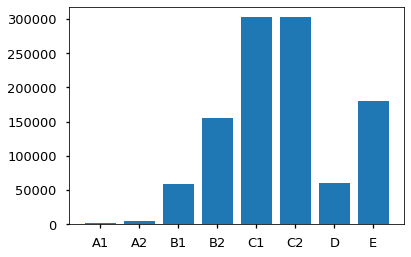

In [44]:
#Os bairros que possuem os menores valores de faturamento,
#deve-se ao fato da relação com uma menor distribuição da "Quantidade de Domicicilios de Renda A1, A2 e B1",
#e uma maior distribuição da "Quantidade de Domicicilios de Renda B2, C1, C2, D e D".
#Ou seja, os bairros que apresentam as menores distribuição de "Quantidade de Domicilios de Renda A1, A2 e B1,
#consequentemente possuem os menores valores de faturamentos.¶

somatoria_DomA1 = top50_menorFat['domiciliosA1'].cumsum().iloc[-1]
somatoria_DomA2 = top50_menorFat['domiciliosA2'].cumsum().iloc[-1]
somatoria_DomB1 = top50_menorFat['domiciliosB1'].cumsum().iloc[-1]
somatoria_DomB2 = top50_menorFat['domiciliosB2'].cumsum().iloc[-1]
somatoria_DomC1 = top50_menorFat['domiciliosC1'].cumsum().iloc[-1]
somatoria_DomC2 = top50_menorFat['domiciliosC2'].cumsum().iloc[-1]
somatoria_DomD = top50_menorFat['domiciliosD'].cumsum().iloc[-1]
somatoria_DomE = top50_menorFat['domiciliosE'].cumsum().iloc[-1]
somatoria_Fat = [top50_menorFat['faturamento'].cumsum().iloc[-1]]

legendaDomicilios = ['A1', 'A2', 'B1', 'B2', 'C1', 'C2', 'D', 'E']

listaDomicilios = [somatoria_DomA1,somatoria_DomA2, somatoria_DomB1, somatoria_DomB2, somatoria_DomC1,
                   somatoria_DomC2, somatoria_DomD, somatoria_DomE]

plt.bar(legendaDomicilios, listaDomicilios)
plt.show()


In [45]:
correlacao = top50_maiorFat[['nome','faturamento','domiciliosA1','domiciliosA2', 'domiciliosB1','domiciliosB2','domiciliosC1','domiciliosC2','domiciliosD','domiciliosE']].groupby(['nome']).mean().corr()
correlacao

,faturamento,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE
faturamento,1.000000,0.913503,0.926050,0.822300,0.554090,0.413006,0.304233,0.224348,0.552639
domiciliosA1,0.913503,1.000000,0.923317,0.734799,0.436110,0.310301,0.230521,0.138140,0.564331
domiciliosA2,0.926050,0.923317,1.000000,0.924245,0.686930,0.552581,0.446409,0.378817,0.707645
domiciliosB1,0.822300,0.734799,0.924245,1.000000,0.893511,0.793072,0.693719,0.639823,0.822127
domiciliosB2,0.554090,0.436110,0.686930,0.893511,1.000000,0.970423,0.904569,0.851706,0.887200
domiciliosC1,0.413006,0.310301,0.552581,0.793072,0.970423,1.000000,0.969796,0.932152,0.878490
domiciliosC2,0.304233,0.230521,0.446409,0.693719,0.904569,0.969796,1.000000,0.965345,0.856465
domiciliosD,0.224348,0.138140,0.378817,0.639823,0.851706,0.932152,0.965345,1.000000,0.794869
domiciliosE,0.552639,0.564331,0.707645,0.822127,0.887200,0.878490,0.856465,0.794869,1.000000


0.32503293548374

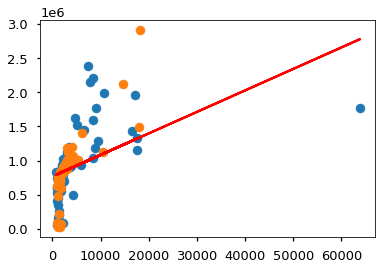

In [53]:
#Regressão Linear Simples
### ATRAVÉS A RENDA MÉDIA, EU CONSIGO ESTIPULAR/PREVER O FATURAMENTO

import pandas as pd

base = pd.read_csv("dados.csv")

base.dropna(inplace = True) 

X = base.iloc[:, 21].values
y = base.iloc[:, 22].values

X = X.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y,
                                                                  test_size = 0.3,
                                                                  random_state = 0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_treinamento, y_treinamento)
score = regressor.score(X_treinamento, y_treinamento)

import matplotlib.pyplot as plt
plt.scatter(X_treinamento, y_treinamento)
plt.plot(X_treinamento, regressor.predict(X_treinamento), color = 'red')

previsoes = regressor.predict(X_teste)
resultado = abs(y_teste - previsoes)
resultado.mean()

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_teste, previsoes)
mse = mean_squared_error(y_teste, previsoes)

plt.scatter(X_teste, y_teste)
plt.plot(X_teste, regressor.predict(X_teste), color = 'red')

regressor.score(X_teste, y_teste)

In [56]:
#Regressão Linear Múltipla
#Através das seguintens váriaveis, foi realizado uma regressão para prever o faturamento: população, popAte9, popDe10a14, popDe15a19, popDe20a24, popDe25a34, popDe35a49,
#popDe50a59, popMaisDe60, domiciliosA1, domiciliosA2, domiciliosB1, domiciliosB2,
#domiciliosC1, domiciliosC2, domiciliosD, domiciliosE, rendaMedia, faturamento.
#
import pandas as pd

base = pd.read_csv("./dados.csv")

base.dropna(inplace = True) 

X = base.iloc[:, 4:22].values
y = base.iloc[:, 22].values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y,
                                                                  test_size = 0.3, ##30 % da base como teste
                                                                  random_state = 0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_treinamento, y_treinamento)
score = regressor.score(X_treinamento, y_treinamento)

previsoes = regressor.predict(X_teste)
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_teste, previsoes)

regressor.score(X_teste, y_teste)

regressor.intercept_
len(regressor.coef_)




18